In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import TimeSeriesSplit
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn import linear_model
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.feature_selection import SelectFromModel

# Data Exploration

## DataFrame info

In [25]:
df_final = pd.read_csv("../raw_data/FINAL_USO.csv",na_values=['null'],index_col='Date',parse_dates=True,infer_datetime_format=True)

In [26]:
! pwd

/home/cypdupmad/code/finnugent/fools_gold/notebooks


In [27]:
df_final

,Open,High,Low,Close,Adj Close,Volume,SP_open,SP_high,SP_low,SP_close,...,GDX_Low,GDX_Close,GDX_Adj Close,GDX_Volume,USO_Open,USO_High,USO_Low,USO_Close,USO_Adj Close,USO_Volume
Date,,,,,,,,,,,,,,,,,,,,,
2011-12-15,154.740005,154.949997,151.710007,152.330002,152.330002,21521900,123.029999,123.199997,121.989998,122.180000,...,51.570000,51.680000,48.973877,20605600,36.900002,36.939999,36.049999,36.130001,36.130001,12616700
2011-12-16,154.309998,155.369995,153.899994,155.229996,155.229996,18124300,122.230003,122.949997,121.300003,121.589996,...,52.040001,52.680000,49.921513,16285400,36.180000,36.500000,35.730000,36.270000,36.270000,12578800
2011-12-19,155.479996,155.860001,154.360001,154.869995,154.869995,12547200,122.059998,122.320000,120.029999,120.290001,...,51.029999,51.169998,48.490578,15120200,36.389999,36.450001,35.930000,36.200001,36.200001,7418200
2011-12-20,156.820007,157.429993,156.580002,156.979996,156.979996,9136300,122.180000,124.139999,120.370003,123.930000,...,52.369999,52.990002,50.215282,11644900,37.299999,37.610001,37.220001,37.560001,37.560001,10041600
2011-12-21,156.979996,157.529999,156.130005,157.160004,157.160004,11996100,123.930000,124.360001,122.750000,124.169998,...,52.419998,52.959999,50.186852,8724300,37.669998,38.240002,37.520000,38.110001,38.110001,10728000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-24,119.570000,120.139999,119.570000,120.019997,120.019997,9736400,239.039993,240.839996,234.270004,234.339996,...,20.650000,21.090000,21.090000,60507000,9.490000,9.520000,9.280000,9.290000,9.290000,21598200
2018-12-26,120.620003,121.000000,119.570000,119.660004,119.660004,14293500,235.970001,246.179993,233.759995,246.179993,...,20.530001,20.620001,20.620001,76365200,9.250000,9.920000,9.230000,9.900000,9.900000,40978800
2018-12-27,120.570000,120.900002,120.139999,120.570000,120.570000,11874400,242.570007,248.289993,238.960007,248.070007,...,20.700001,20.969999,20.969999,52393000,9.590000,9.650000,9.370000,9.620000,9.620000,36578700


In [28]:
df_final.shape

(1718, 80)

In [29]:
df_final.describe()

,Open,High,Low,Close,Adj Close,Volume,SP_open,SP_high,SP_low,SP_close,...,GDX_Low,GDX_Close,GDX_Adj Close,GDX_Volume,USO_Open,USO_High,USO_Low,USO_Close,USO_Adj Close,USO_Volume
count,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1.718000e+03,1718.000000,1718.000000,1718.000000,1718.000000,...,1718.000000,1718.000000,1718.000000,1.718000e+03,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1.718000e+03
mean,127.323434,127.854237,126.777695,127.319482,127.319482,8.446327e+06,204.490023,205.372637,203.487014,204.491222,...,26.384575,26.715012,25.924624,4.356515e+07,22.113417,22.307148,21.904657,22.109051,22.109051,1.922313e+07
std,17.526993,17.631189,17.396513,17.536269,17.536269,4.920731e+06,43.831928,43.974644,43.618940,43.776999,...,10.490908,10.603110,9.886570,2.909151e+07,11.431056,11.478671,11.373997,11.432787,11.432787,1.575743e+07
min,100.919998,100.989998,100.230003,100.500000,100.500000,1.501600e+06,122.059998,122.320000,120.029999,120.290001,...,12.400000,12.470000,12.269618,4.729000e+06,7.820000,8.030000,7.670000,7.960000,7.960000,1.035100e+06
25%,116.220001,116.540001,115.739998,116.052502,116.052502,5.412925e+06,170.392498,170.962506,169.577499,170.397500,...,20.355000,20.585000,20.180950,2.259968e+07,11.420000,11.500000,11.300000,11.392500,11.392500,6.229500e+06
50%,121.915001,122.325001,121.369999,121.795002,121.795002,7.483900e+06,205.464996,206.459999,204.430000,205.529999,...,22.870001,23.054999,22.677604,3.730465e+07,16.450000,16.635001,16.040000,16.345000,16.345000,1.613015e+07
75%,128.427494,129.087498,127.840001,128.470001,128.470001,1.020795e+07,237.292500,237.722500,236.147503,236.889996,...,26.797500,27.317500,26.478154,5.697055e+07,34.419998,34.667499,34.110000,34.417499,34.417499,2.672375e+07
max,173.199997,174.070007,172.919998,173.610001,173.610001,9.380420e+07,293.089996,293.940002,291.809998,293.579987,...,56.770000,57.470001,54.617039,2.321536e+08,41.599998,42.299999,41.299999,42.009998,42.009998,1.102657e+08


In [30]:
df_final.dtypes

Open             float64
High             float64
Low              float64
Close            float64
Adj Close        float64
                  ...   
USO_High         float64
USO_Low          float64
USO_Close        float64
USO_Adj Close    float64
USO_Volume         int64
Length: 80, dtype: object

In [31]:
df_final.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1718 entries, 2011-12-15 to 2018-12-31
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Open           1718 non-null   float64
 1   High           1718 non-null   float64
 2   Low            1718 non-null   float64
 3   Close          1718 non-null   float64
 4   Adj Close      1718 non-null   float64
 5   Volume         1718 non-null   int64  
 6   SP_open        1718 non-null   float64
 7   SP_high        1718 non-null   float64
 8   SP_low         1718 non-null   float64
 9   SP_close       1718 non-null   float64
 10  SP_Ajclose     1718 non-null   float64
 11  SP_volume      1718 non-null   int64  
 12  DJ_open        1718 non-null   float64
 13  DJ_high        1718 non-null   float64
 14  DJ_low         1718 non-null   float64
 15  DJ_close       1718 non-null   float64
 16  DJ_Ajclose     1718 non-null   float64
 17  DJ_volume      1718 non-null   int

## Adjusted Versus Non Adjusted

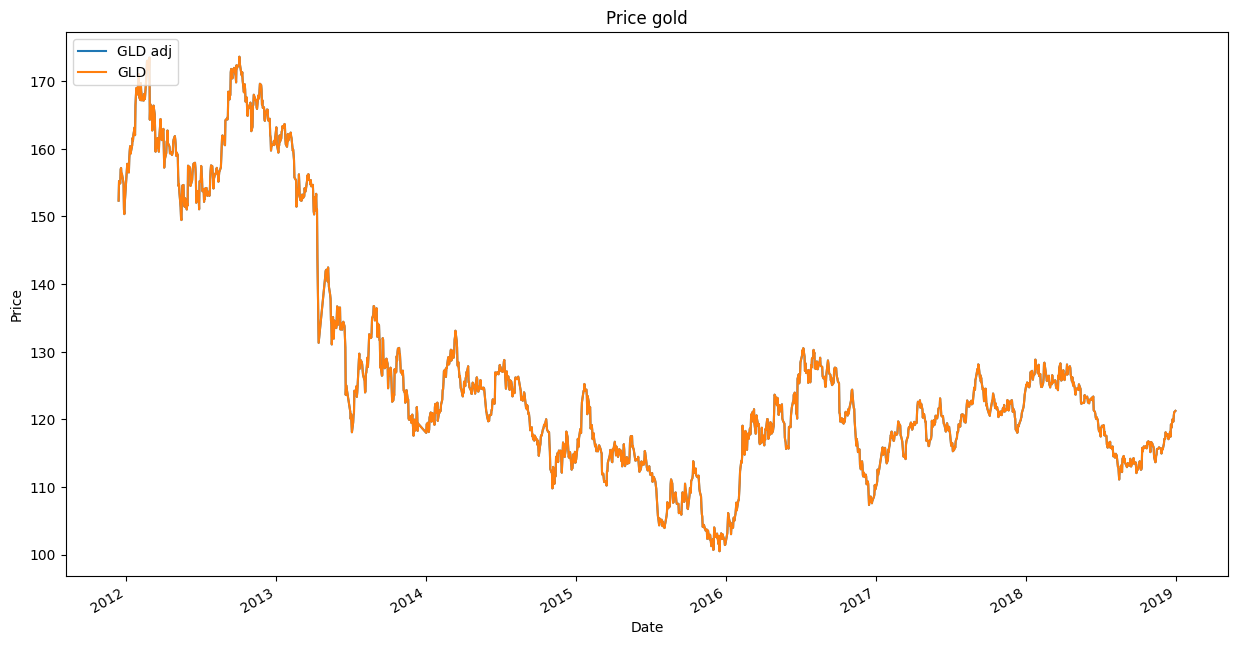

In [32]:
GLD_adj_close = df_final['Adj Close']
GLD_close = df_final['Close']
#df_ax = GLD_adj_close.plot(title='Price gold',figsize=(15,8))
df_p = pd.DataFrame({'GLD adj':GLD_adj_close, 'GLD':GLD_close})
df_ax = df_p.plot(title='Price gold',figsize=(15,8))
df_ax.set_ylabel('Price')
df_ax.legend(loc='upper left')


Adjusted close is the closing price after adjustments for all applicable splits and dividend distributions. Data is adjusted using appropriate split and dividend multipliers, adhering to Center for Research in Security Prices (CRSP) standards.


In [33]:
def adjusted_dif(pd1,pd2):
    new_pd=pd1-pd2
    new_pd.plot(title='Adjusted Vs Non adjusted',figsize=(15,8))
    

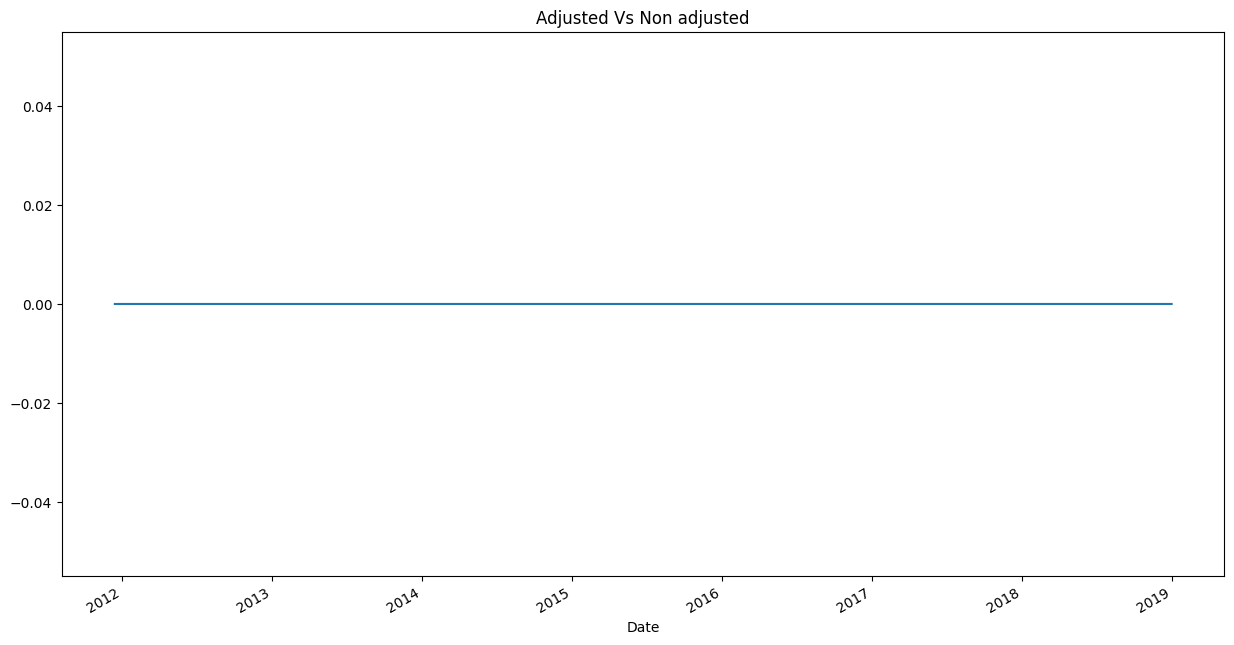

In [34]:
adjusted_dif(GLD_adj_close,GLD_close)

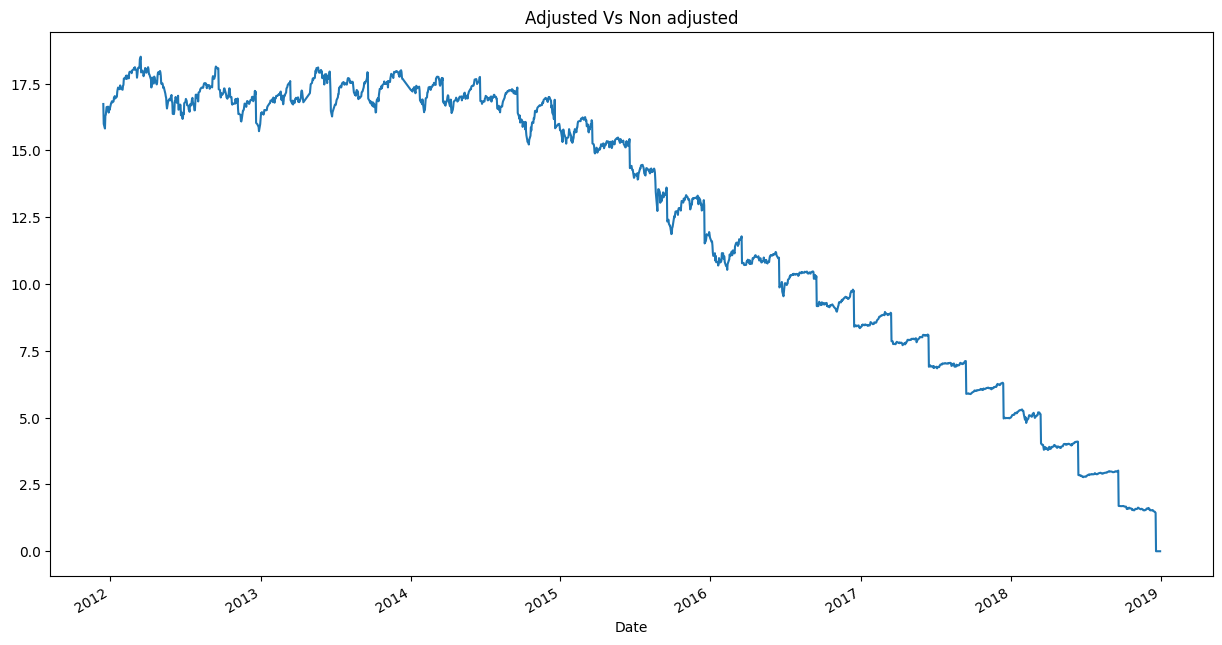

In [35]:
adjusted_dif(df_final['SP_close'],df_final['SP_Ajclose'])

' We need to use Adjusted price for all features !'

In [36]:
# selecting columns where column name contains 'close' string
df_final.filter(like='close')
df_final.filter(like='Close')

,Close,Adj Close,GDX_Close,GDX_Adj Close,USO_Close,USO_Adj Close
Date,,,,,,
2011-12-15,152.330002,152.330002,51.680000,48.973877,36.130001,36.130001
2011-12-16,155.229996,155.229996,52.680000,49.921513,36.270000,36.270000
2011-12-19,154.869995,154.869995,51.169998,48.490578,36.200001,36.200001
2011-12-20,156.979996,156.979996,52.990002,50.215282,37.560001,37.560001
2011-12-21,157.160004,157.160004,52.959999,50.186852,38.110001,38.110001
...,...,...,...,...,...,...
2018-12-24,120.019997,120.019997,21.090000,21.090000,9.290000,9.290000
2018-12-26,119.660004,119.660004,20.620001,20.620001,9.900000,9.900000
2018-12-27,120.570000,120.570000,20.969999,20.969999,9.620000,9.620000


In [37]:
# convert lowercase column use apply()
df_final.columns= df_final.columns.str.lower()

In [38]:
df_final.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1718 entries, 2011-12-15 to 2018-12-31
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   open           1718 non-null   float64
 1   high           1718 non-null   float64
 2   low            1718 non-null   float64
 3   close          1718 non-null   float64
 4   adj close      1718 non-null   float64
 5   volume         1718 non-null   int64  
 6   sp_open        1718 non-null   float64
 7   sp_high        1718 non-null   float64
 8   sp_low         1718 non-null   float64
 9   sp_close       1718 non-null   float64
 10  sp_ajclose     1718 non-null   float64
 11  sp_volume      1718 non-null   int64  
 12  dj_open        1718 non-null   float64
 13  dj_high        1718 non-null   float64
 14  dj_low         1718 non-null   float64
 15  dj_close       1718 non-null   float64
 16  dj_ajclose     1718 non-null   float64
 17  dj_volume      1718 non-null   int

In [39]:
df_final_feature=df_final.filter(like='open')

In [40]:
df_final_feature

,open,sp_open,dj_open,eg_open,eu_open,of_open,os_open,sf_open,usb_open,plt_open,pld_open,usdi_open,gdx_open,uso_open
Date,,,,,,,,,,,,,,
2011-12-15,154.740005,123.029999,11825.29004,74.550003,1.2982,104.88,94.91,54248,1.911,1420.30,614.70,80.565,53.009998,36.900002
2011-12-16,154.309998,122.230003,11870.25000,73.599998,1.3020,103.51,93.43,53650,1.851,1414.75,622.60,80.175,52.500000,36.180000
2011-12-19,155.479996,122.059998,11866.54004,69.099998,1.3043,103.63,93.77,53400,1.810,1422.65,626.00,80.300,52.490002,36.389999
2011-12-20,156.820007,122.180000,11769.20996,66.449997,1.3003,104.30,96.39,52795,1.927,1408.95,622.45,80.890,52.380001,37.299999
2011-12-21,156.979996,123.930000,12103.58008,67.099998,1.3079,107.15,97.54,53519,1.970,1434.40,625.70,80.105,53.150002,37.669998
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-24,119.570000,239.039993,22317.27930,2.950000,1.1370,53.49,45.34,37325,2.826,791.85,1163.40,96.440,20.700001,9.490000
2018-12-26,120.620003,235.970001,21857.73047,3.000000,1.1363,50.84,43.09,37607,2.751,788.75,1176.00,96.100,21.350000,9.250000
2018-12-27,120.570000,242.570007,22629.06055,2.950000,1.1353,54.65,46.41,38274,2.803,799.40,1190.05,96.460,20.840000,9.590000


<AxesSubplot: >

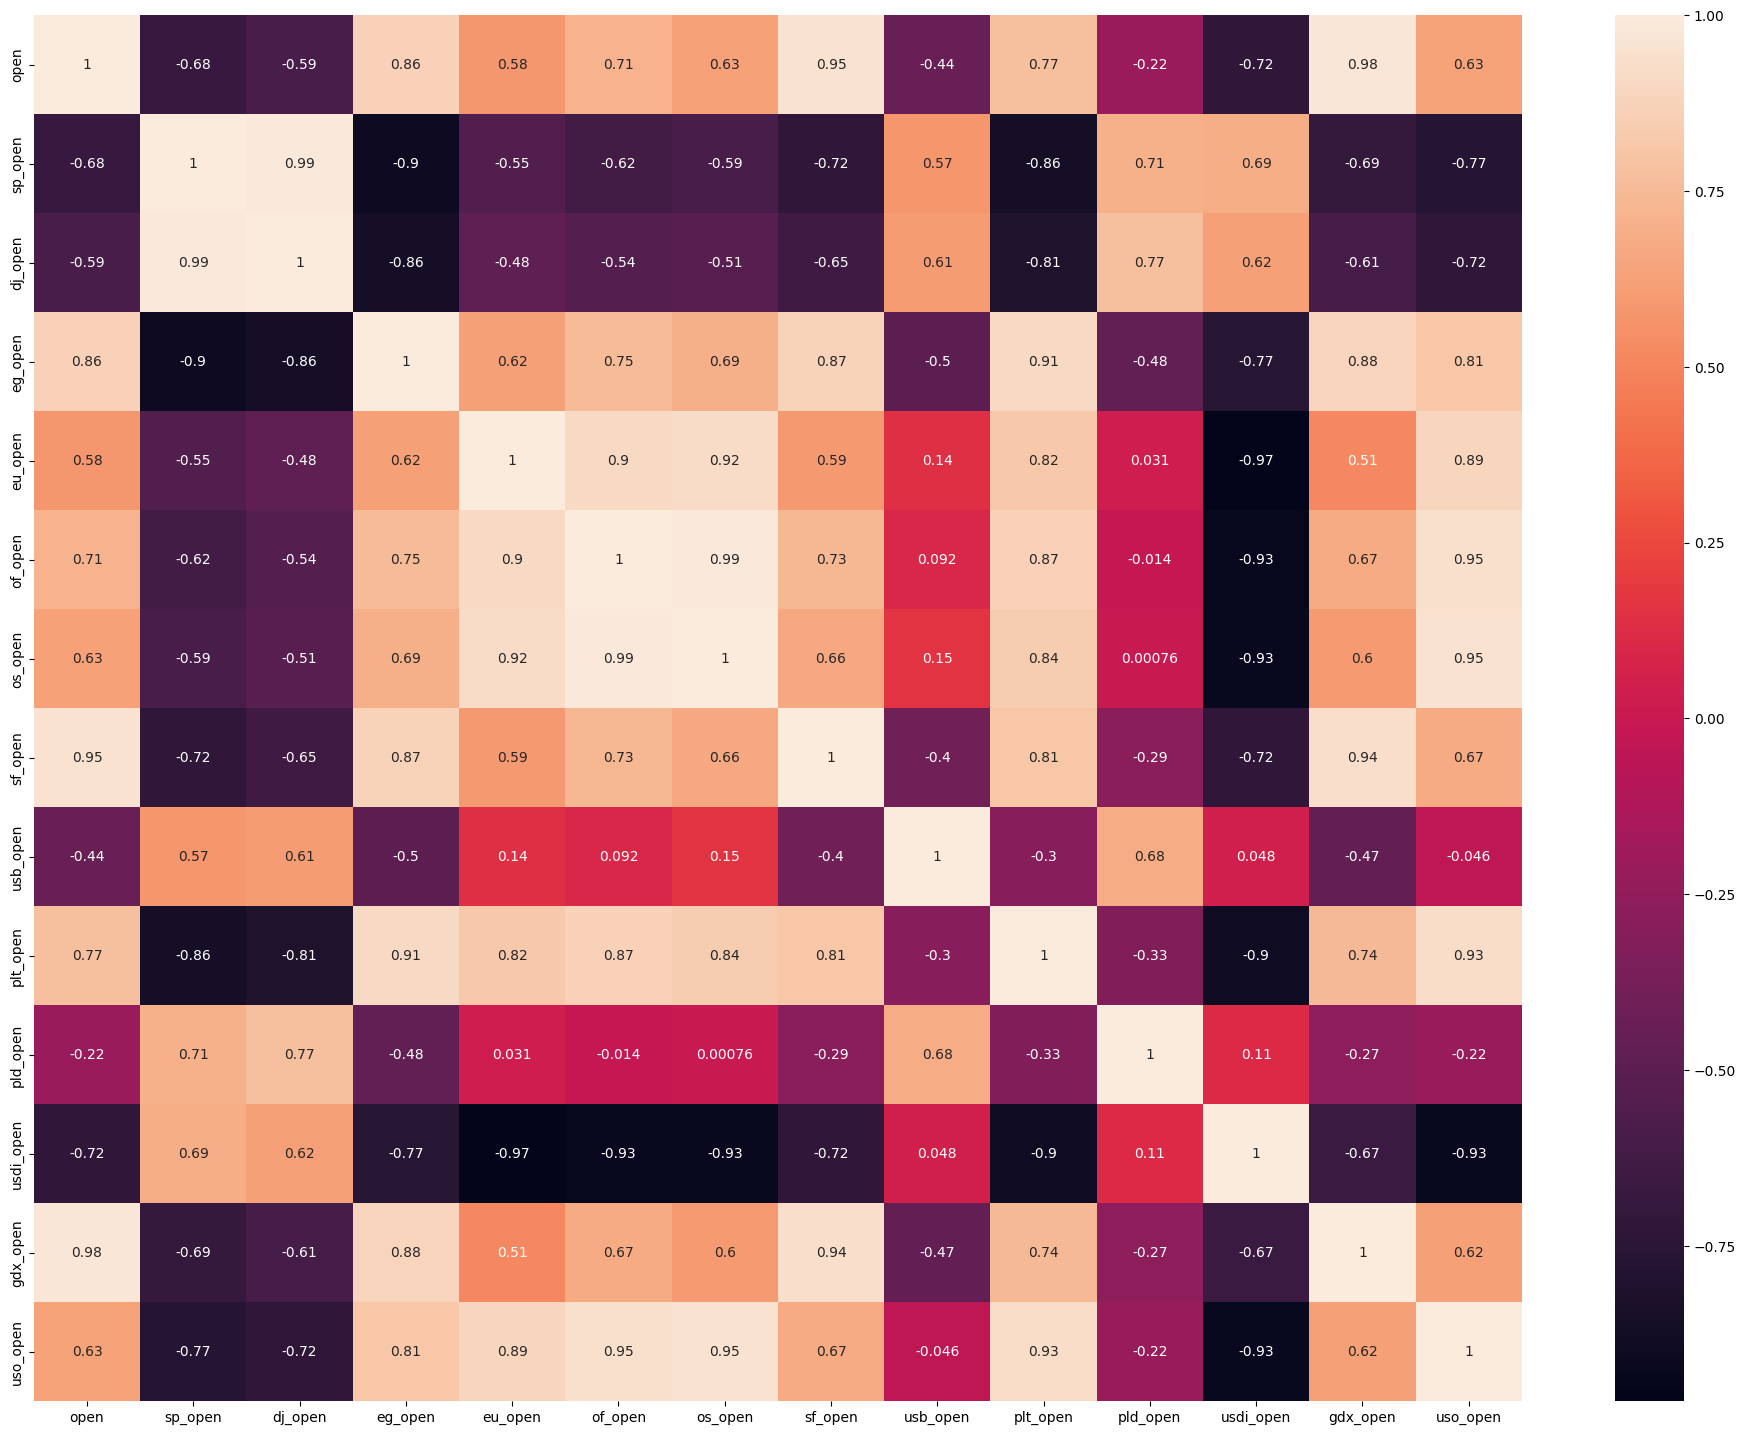

In [41]:
plt.figure(figsize=(24,18)) 
sns.heatmap(df_final_feature.corr(), annot=True)

Should we drop absolute correaltion below 0.5 ?

In [42]:
corr_matrix=df_final_feature.corr()
coef=corr_matrix["open"].sort_values(ascending=False)

In [43]:
coef

open         1.000000
gdx_open     0.975510
sf_open      0.946454
eg_open      0.863226
plt_open     0.774171
of_open      0.708938
uso_open     0.634872
os_open      0.629795
eu_open      0.579304
pld_open    -0.215840
usb_open    -0.441780
dj_open     -0.588615
sp_open     -0.684314
usdi_open   -0.720350
Name: open, dtype: float64

# Features Building

MACD , RSI , Boillinger band

# Model Building

## Features and targets formatting

In [44]:
df_final.head()

,open,high,low,close,adj close,volume,sp_open,sp_high,sp_low,sp_close,...,gdx_low,gdx_close,gdx_adj close,gdx_volume,uso_open,uso_high,uso_low,uso_close,uso_adj close,uso_volume
Date,,,,,,,,,,,,,,,,,,,,,
2011-12-15,154.740005,154.949997,151.710007,152.330002,152.330002,21521900,123.029999,123.199997,121.989998,122.180000,...,51.570000,51.680000,48.973877,20605600,36.900002,36.939999,36.049999,36.130001,36.130001,12616700
2011-12-16,154.309998,155.369995,153.899994,155.229996,155.229996,18124300,122.230003,122.949997,121.300003,121.589996,...,52.040001,52.680000,49.921513,16285400,36.180000,36.500000,35.730000,36.270000,36.270000,12578800
2011-12-19,155.479996,155.860001,154.360001,154.869995,154.869995,12547200,122.059998,122.320000,120.029999,120.290001,...,51.029999,51.169998,48.490578,15120200,36.389999,36.450001,35.930000,36.200001,36.200001,7418200
2011-12-20,156.820007,157.429993,156.580002,156.979996,156.979996,9136300,122.180000,124.139999,120.370003,123.930000,...,52.369999,52.990002,50.215282,11644900,37.299999,37.610001,37.220001,37.560001,37.560001,10041600
2011-12-21,156.979996,157.529999,156.130005,157.160004,157.160004,11996100,123.930000,124.360001,122.750000,124.169998,...,52.419998,52.959999,50.186852,8724300,37.669998,38.240002,37.520000,38.110001,38.110001,10728000


In [45]:
# Features
X=df_final.drop(['adj close'],axis=1)
X=X.drop(['close'],axis=1)

In [46]:
# Target column
y = pd.DataFrame(df_final['adj close'])
#y = df_final['adj close']

In [47]:
feature_columns=X.columns

In [48]:
scaler = MinMaxScaler()

In [49]:
X_scaled=pd.DataFrame(columns=feature_columns, data=scaler.fit_transform(X), index=X.index)

In [50]:
display(X_scaled.head())
print('Shape of features : ', X_scaled.shape)
print('Shape of target : ', y.shape)

,open,high,low,volume,sp_open,sp_high,sp_low,sp_close,sp_ajclose,sp_volume,...,gdx_low,gdx_close,gdx_adj close,gdx_volume,uso_open,uso_high,uso_low,uso_close,uso_adj close,uso_volume
Date,,,,,,,,,,,,,,,,,,,,,
2011-12-15,0.744604,0.738369,0.708213,0.216899,0.005672,0.005128,0.011410,0.010907,0.005227,0.357232,...,0.882804,0.871333,0.866741,0.069810,0.860865,0.843595,0.843889,0.827313,0.827313,0.106029
2011-12-16,0.738655,0.744116,0.738341,0.180089,0.000994,0.003671,0.007393,0.007502,0.006067,0.401814,...,0.893396,0.893556,0.889119,0.050814,0.839550,0.830756,0.834374,0.831424,0.831424,0.105682
2011-12-19,0.754842,0.750821,0.744669,0.119667,0.000000,0.000000,0.000000,0.000000,0.000000,0.325512,...,0.870633,0.860000,0.855329,0.045691,0.845767,0.829297,0.840321,0.829369,0.829369,0.058437
2011-12-20,0.773381,0.772304,0.775210,0.082714,0.000702,0.010605,0.001979,0.021005,0.016988,0.412112,...,0.900834,0.900444,0.896056,0.030410,0.872706,0.863146,0.878680,0.869310,0.869310,0.082454
2011-12-21,0.775595,0.773673,0.769019,0.113697,0.010934,0.011887,0.015834,0.022390,0.018108,0.347056,...,0.901961,0.899778,0.895385,0.017568,0.883659,0.881529,0.887600,0.885463,0.885463,0.088738


Shape of features :  (1718, 78)
Shape of target :  (1718, 1)


In [51]:
y.head()

,adj close
Date,
2011-12-15,152.330002
2011-12-16,155.229996
2011-12-19,154.869995
2011-12-20,156.979996
2011-12-21,157.160004


In [52]:
# Shift target array because we want to predict the n + 1 day value
y_shifted = y.shift(-1)
y_shifted.head()

,adj close
Date,
2011-12-15,155.229996
2011-12-16,154.869995
2011-12-19,156.979996
2011-12-20,157.160004
2011-12-21,156.039993


In [53]:
# Taking last 90 rows of data to be validation set and exlcuding the last row as NaN
X_val = X_scaled[-90:-1]
X_train = X_scaled[:-90]
y_val = y_shifted[-90:-1]
y_train = y_shifted[:-90]

print('Shape of X_train : ', X_train.shape)
print('Shape of y_train : ', y_train.shape)
print('Shape of X_val : ', X_val.shape)
print('Shape of y_val : ', y_val.shape)

Shape of X_train :  (1628, 78)
Shape of y_train :  (1628, 1)
Shape of X_val :  (89, 78)
Shape of y_val :  (89, 1)


In [54]:
X_train.head()

,open,high,low,volume,sp_open,sp_high,sp_low,sp_close,sp_ajclose,sp_volume,...,gdx_low,gdx_close,gdx_adj close,gdx_volume,uso_open,uso_high,uso_low,uso_close,uso_adj close,uso_volume
Date,,,,,,,,,,,,,,,,,,,,,
2011-12-15,0.744604,0.738369,0.708213,0.216899,0.005672,0.005128,0.011410,0.010907,0.005227,0.357232,...,0.882804,0.871333,0.866741,0.069810,0.860865,0.843595,0.843889,0.827313,0.827313,0.106029
2011-12-16,0.738655,0.744116,0.738341,0.180089,0.000994,0.003671,0.007393,0.007502,0.006067,0.401814,...,0.893396,0.893556,0.889119,0.050814,0.839550,0.830756,0.834374,0.831424,0.831424,0.105682
2011-12-19,0.754842,0.750821,0.744669,0.119667,0.000000,0.000000,0.000000,0.000000,0.000000,0.325512,...,0.870633,0.860000,0.855329,0.045691,0.845767,0.829297,0.840321,0.829369,0.829369,0.058437
2011-12-20,0.773381,0.772304,0.775210,0.082714,0.000702,0.010605,0.001979,0.021005,0.016988,0.412112,...,0.900834,0.900444,0.896056,0.030410,0.872706,0.863146,0.878680,0.869310,0.869310,0.082454
2011-12-21,0.775595,0.773673,0.769019,0.113697,0.010934,0.011887,0.015834,0.022390,0.018108,0.347056,...,0.901961,0.899778,0.895385,0.017568,0.883659,0.881529,0.887600,0.885463,0.885463,0.088738


## Traint test split

In [55]:
ts_split= TimeSeriesSplit(n_splits=10)
for train_index, test_index in ts_split.split(X_train):
        XX_train, XX_test = X_train[:len(train_index)], X_train[len(train_index): (len(train_index)+len(test_index))]
        yy_train, yy_test = y_train[:len(train_index)].values.ravel(), y_train[len(train_index): (len(train_index)+len(test_index))].values.ravel()

## Model building

### Model evaluation

In [56]:
# Save all soultion models
solution_models = {}

In [57]:
def validate_result(model, model_name):
    predicted = model.predict(X_val)
    RSME_score = np.sqrt(mean_squared_error(y_val, predicted))
    print('RMSE: ', RSME_score)
    
    R2_score = r2_score(y_val, predicted)
    print('R2 score: ', R2_score)

In [58]:
def evaluate_result(model, model_name):
    y_pred = model.predict(X_val)
    final_pd=y_val.copy()
    final_pd['pred']=y_pred
    final_pd['signal']=''
    result=[]
    for index, row in final_pd.iterrows():
        if row['adj close']>row['pred']:
            result.append(-1)
        else:
            result.append(1)
            
    pnl=0
    pnl_history=[100000]
    for i in range(len(result)-1):
        pnl+=(final_pd['adj close'][i+1]-final_pd['adj close'][i])*result[i]*(100000)
        pnl_history.append(pnl)
        
    plt.plot(pnl_history)
    
    plt.ylabel('PnL')
    plt.title(model_name + ' PnL')
    plt.legend(loc='upper right')
    plt.show()

### Default Model: Decision Tree Regressor

In [59]:
# Save all soultion models
solution_models = {}

In [60]:
dt = DecisionTreeRegressor(random_state=0)
default_dt=dt.fit(X_train, y_train)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


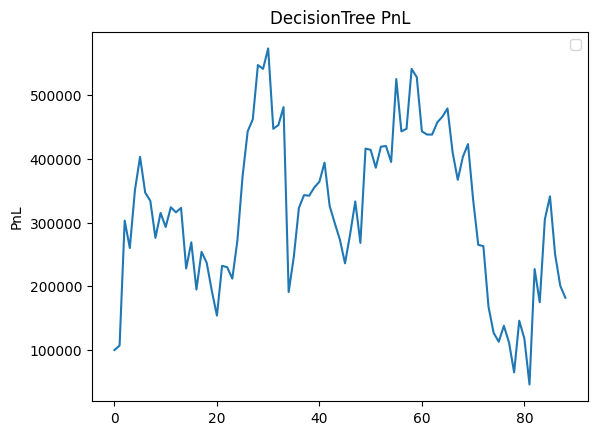

In [61]:
evaluate_result(dt,'DecisionTree');

In [62]:
validate_result(dt,'DecisionTree');

RMSE:  1.3507600988807384
R2 score:  0.5797507590102431


In [63]:
solution_models['Decision Tree'] = dt

### Support Vector Regressor

In [64]:
# SVR with  linear Kernel
svr_lin = SVR(kernel='linear')
linear_svr_clf_feat = svr_lin.fit(X_train,y_train.values.ravel())

In [65]:
validate_result(svr_lin,'Support Vector Regressor');

RMSE:  0.7854558557833853
R2 score:  0.8579000075051578


In [66]:
solution_models['Support Vector Regressor'] = linear_svr_clf_feat

### Random Forest

In [67]:
rf_cl = RandomForestRegressor(n_estimators=50, random_state=0)
random_forest_clf_feat = rf_cl.fit(X_train,y_train)

/tmp/ipykernel_5499/3507230477.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  random_forest_clf_feat = rf_cl.fit(X_train,y_train)


In [68]:
validate_result(random_forest_clf_feat,'Random Forest with All feat')

RMSE:  0.8998894007873532
R2 score:  0.8134785579369485


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


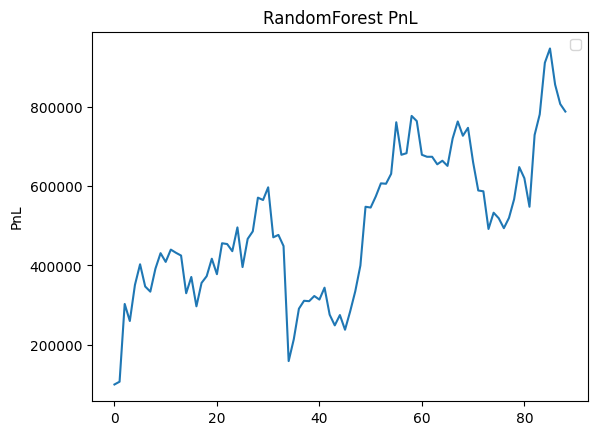

In [69]:
evaluate_result(random_forest_clf_feat,'RandomForest');

Hyper parameter Tuning

In this I will tune 3 parameters of Random forest which are n_estimators,max_features,max_depth

In [70]:
random_forest_parameters = {
    'n_estimators':[10,15,20, 50, 100],
    'max_features':['auto','sqrt','log2'],
    'max_depth':[2, 3, 5, 7,10],
}

In [71]:
grid_search_RF_feat = GridSearchCV(estimator=RandomForestRegressor(),
                           param_grid=random_forest_parameters,
                           cv=ts_split,
)

In [72]:
grid_search_RF_feat.fit(X_train, y_train)

/home/cypdupmad/.pyenv/versions/taxifare-env/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cypdupmad/.pyenv/versions/taxifare-env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/cypdupmad/.pyenv/versions/taxifare-env/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_

/home/cypdupmad/.pyenv/versions/taxifare-env/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cypdupmad/.pyenv/versions/taxifare-env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/cypdupmad/.pyenv/versions/taxifare-env/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_

/home/cypdupmad/.pyenv/versions/taxifare-env/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cypdupmad/.pyenv/versions/taxifare-env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/cypdupmad/.pyenv/versions/taxifare-env/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_

/home/cypdupmad/.pyenv/versions/taxifare-env/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cypdupmad/.pyenv/versions/taxifare-env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/cypdupmad/.pyenv/versions/taxifare-env/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_

/home/cypdupmad/.pyenv/versions/taxifare-env/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cypdupmad/.pyenv/versions/taxifare-env/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cypdupmad/.pyenv/versions/taxifare-env/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cypdupmad/.pyenv/versions/taxif

/home/cypdupmad/.pyenv/versions/taxifare-env/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cypdupmad/.pyenv/versions/taxifare-env/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cypdupmad/.pyenv/versions/taxifare-env/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cypdupmad/.pyenv/versions/taxif

/home/cypdupmad/.pyenv/versions/taxifare-env/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cypdupmad/.pyenv/versions/taxifare-env/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cypdupmad/.pyenv/versions/taxifare-env/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cypdupmad/.pyenv/versions/taxif

/home/cypdupmad/.pyenv/versions/taxifare-env/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cypdupmad/.pyenv/versions/taxifare-env/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cypdupmad/.pyenv/versions/taxifare-env/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cypdupmad/.pyenv/versions/taxif

/home/cypdupmad/.pyenv/versions/taxifare-env/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cypdupmad/.pyenv/versions/taxifare-env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/cypdupmad/.pyenv/versions/taxifare-env/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_

/home/cypdupmad/.pyenv/versions/taxifare-env/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cypdupmad/.pyenv/versions/taxifare-env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/cypdupmad/.pyenv/versions/taxifare-env/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_

/home/cypdupmad/.pyenv/versions/taxifare-env/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cypdupmad/.pyenv/versions/taxifare-env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/cypdupmad/.pyenv/versions/taxifare-env/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_

/home/cypdupmad/.pyenv/versions/taxifare-env/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cypdupmad/.pyenv/versions/taxifare-env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/cypdupmad/.pyenv/versions/taxifare-env/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_

/home/cypdupmad/.pyenv/versions/taxifare-env/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cypdupmad/.pyenv/versions/taxifare-env/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cypdupmad/.pyenv/versions/taxifare-env/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cypdupmad/.pyenv/versions/taxif

/home/cypdupmad/.pyenv/versions/taxifare-env/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cypdupmad/.pyenv/versions/taxifare-env/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cypdupmad/.pyenv/versions/taxifare-env/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cypdupmad/.pyenv/versions/taxif

/home/cypdupmad/.pyenv/versions/taxifare-env/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cypdupmad/.pyenv/versions/taxifare-env/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cypdupmad/.pyenv/versions/taxifare-env/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cypdupmad/.pyenv/versions/taxif

/home/cypdupmad/.pyenv/versions/taxifare-env/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cypdupmad/.pyenv/versions/taxifare-env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/cypdupmad/.pyenv/versions/taxifare-env/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_

/home/cypdupmad/.pyenv/versions/taxifare-env/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cypdupmad/.pyenv/versions/taxifare-env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/cypdupmad/.pyenv/versions/taxifare-env/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_

/home/cypdupmad/.pyenv/versions/taxifare-env/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cypdupmad/.pyenv/versions/taxifare-env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/cypdupmad/.pyenv/versions/taxifare-env/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_

/home/cypdupmad/.pyenv/versions/taxifare-env/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cypdupmad/.pyenv/versions/taxifare-env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/cypdupmad/.pyenv/versions/taxifare-env/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_

/home/cypdupmad/.pyenv/versions/taxifare-env/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cypdupmad/.pyenv/versions/taxifare-env/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cypdupmad/.pyenv/versions/taxifare-env/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cypdupmad/.pyenv/versions/taxif

/home/cypdupmad/.pyenv/versions/taxifare-env/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cypdupmad/.pyenv/versions/taxifare-env/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cypdupmad/.pyenv/versions/taxifare-env/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cypdupmad/.pyenv/versions/taxif

/home/cypdupmad/.pyenv/versions/taxifare-env/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cypdupmad/.pyenv/versions/taxifare-env/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cypdupmad/.pyenv/versions/taxifare-env/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cypdupmad/.pyenv/versions/taxif

/home/cypdupmad/.pyenv/versions/taxifare-env/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cypdupmad/.pyenv/versions/taxifare-env/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cypdupmad/.pyenv/versions/taxifare-env/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cypdupmad/.pyenv/versions/taxif

/home/cypdupmad/.pyenv/versions/taxifare-env/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cypdupmad/.pyenv/versions/taxifare-env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/cypdupmad/.pyenv/versions/taxifare-env/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_

/home/cypdupmad/.pyenv/versions/taxifare-env/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cypdupmad/.pyenv/versions/taxifare-env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/cypdupmad/.pyenv/versions/taxifare-env/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_

/home/cypdupmad/.pyenv/versions/taxifare-env/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cypdupmad/.pyenv/versions/taxifare-env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/cypdupmad/.pyenv/versions/taxifare-env/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_

/home/cypdupmad/.pyenv/versions/taxifare-env/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cypdupmad/.pyenv/versions/taxifare-env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/cypdupmad/.pyenv/versions/taxifare-env/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_

/home/cypdupmad/.pyenv/versions/taxifare-env/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cypdupmad/.pyenv/versions/taxifare-env/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cypdupmad/.pyenv/versions/taxifare-env/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cypdupmad/.pyenv/versions/taxif

/home/cypdupmad/.pyenv/versions/taxifare-env/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cypdupmad/.pyenv/versions/taxifare-env/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cypdupmad/.pyenv/versions/taxifare-env/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cypdupmad/.pyenv/versions/taxif

/home/cypdupmad/.pyenv/versions/taxifare-env/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cypdupmad/.pyenv/versions/taxifare-env/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cypdupmad/.pyenv/versions/taxifare-env/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cypdupmad/.pyenv/versions/taxif

/home/cypdupmad/.pyenv/versions/taxifare-env/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cypdupmad/.pyenv/versions/taxifare-env/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cypdupmad/.pyenv/versions/taxifare-env/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cypdupmad/.pyenv/versions/taxif

/home/cypdupmad/.pyenv/versions/taxifare-env/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cypdupmad/.pyenv/versions/taxifare-env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/cypdupmad/.pyenv/versions/taxifare-env/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_

/home/cypdupmad/.pyenv/versions/taxifare-env/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cypdupmad/.pyenv/versions/taxifare-env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/cypdupmad/.pyenv/versions/taxifare-env/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_

/home/cypdupmad/.pyenv/versions/taxifare-env/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cypdupmad/.pyenv/versions/taxifare-env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/cypdupmad/.pyenv/versions/taxifare-env/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_

/home/cypdupmad/.pyenv/versions/taxifare-env/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cypdupmad/.pyenv/versions/taxifare-env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/cypdupmad/.pyenv/versions/taxifare-env/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_

/home/cypdupmad/.pyenv/versions/taxifare-env/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cypdupmad/.pyenv/versions/taxifare-env/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cypdupmad/.pyenv/versions/taxifare-env/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cypdupmad/.pyenv/versions/taxif

/home/cypdupmad/.pyenv/versions/taxifare-env/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cypdupmad/.pyenv/versions/taxifare-env/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cypdupmad/.pyenv/versions/taxifare-env/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cypdupmad/.pyenv/versions/taxif

/home/cypdupmad/.pyenv/versions/taxifare-env/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cypdupmad/.pyenv/versions/taxifare-env/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cypdupmad/.pyenv/versions/taxifare-env/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cypdupmad/.pyenv/versions/taxif

GridSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=10, test_size=None),
             estimator=RandomForestRegressor(),
             param_grid={'max_depth': [2, 3, 5, 7, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [10, 15, 20, 50, 100]})

In [73]:
print(grid_search_RF_feat.best_params_)

{'max_depth': 7, 'max_features': 'auto', 'n_estimators': 10}


In [74]:
validate_result(grid_search_RF_feat,'RandomForest GS')

RMSE:  0.8397729748133992
R2 score:  0.8375669946059697


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


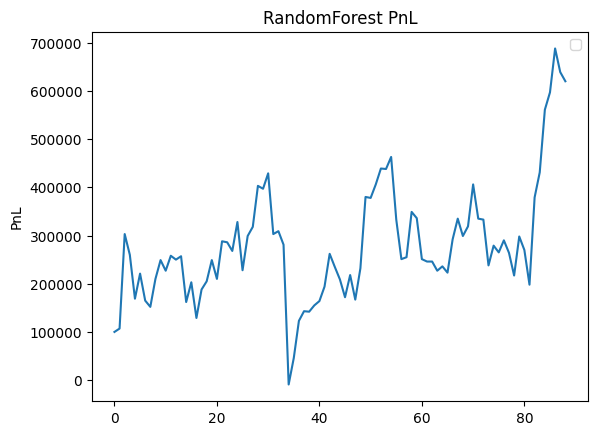

In [75]:
evaluate_result(grid_search_RF_feat,'RandomForest');

In [77]:
solution_models['Default Random Forest'] = random_forest_clf_feat

### Solution Model : Lasso and Ridge

In [78]:
lasso_clf = LassoCV(n_alphas=1000, max_iter=3000, random_state=0)
lasso_clf_feat = lasso_clf.fit(X_train,y_train)
validate_result(lasso_clf_feat,'LassoCV')
solution_models['LassoCV All feat'] = lasso_clf_feat

/home/cypdupmad/.pyenv/versions/taxifare-env/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:1614: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


RMSE:  0.7180708358526847
R2 score:  0.8812359311383502


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


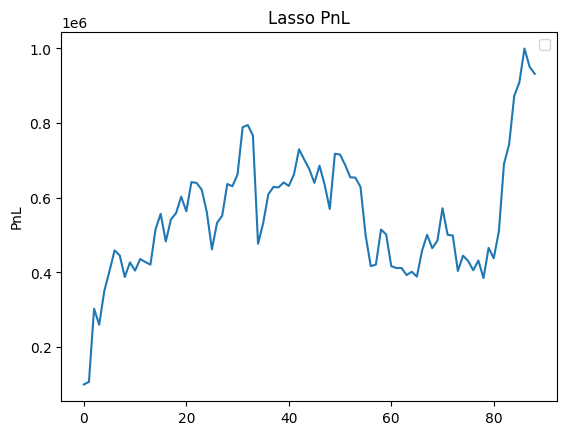

In [79]:
evaluate_result(lasso_clf_feat,'Lasso');

In [80]:
ridge_clf = RidgeCV(gcv_mode='auto')
ridge_clf_feat = ridge_clf.fit(X_train,y_train)
validate_result(ridge_clf_feat,'RidgeCV')
solution_models['RidgeCV All Feat'] = ridge_clf_feat

RMSE:  0.7023908235106188
R2 score:  0.8863660379494026


In [154]:
ridge_clf_feat.predict(X_val).flatten()

array([112.65261072, 113.26745316, 112.26504721, 113.8384314 ,
       114.41195861, 113.90407915, 114.03704583, 113.54446902,
       113.35905289, 112.59187933, 112.97133453, 113.78234804,
       113.19591418, 113.25127055, 112.86108185, 113.81859073,
       114.01678201, 113.00001582, 113.79158754, 113.66824788,
       114.07368669, 114.35678098, 113.50649251, 113.7513972 ,
       113.77110616, 113.20808149, 112.23782634, 112.68380662,
       112.86866323, 113.55845129, 113.81339241, 113.77363661,
       112.78711972, 112.80868335, 113.05937586, 115.66931782,
       115.50867952, 116.52808341, 116.13298621, 115.93205307,
       116.07237207, 116.10733566, 115.63292669, 117.2224862 ,
       116.57204846, 116.24623818, 117.23978091, 116.41364426,
       116.17972681, 115.08996214, 117.05270378, 116.8161587 ,
       116.64633249, 116.44764699, 116.18443677, 115.8894158 ,
       114.79962547, 114.12510418, 113.93645742, 114.47815316,
       115.33178388, 115.96463639, 115.98534853, 116.02

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


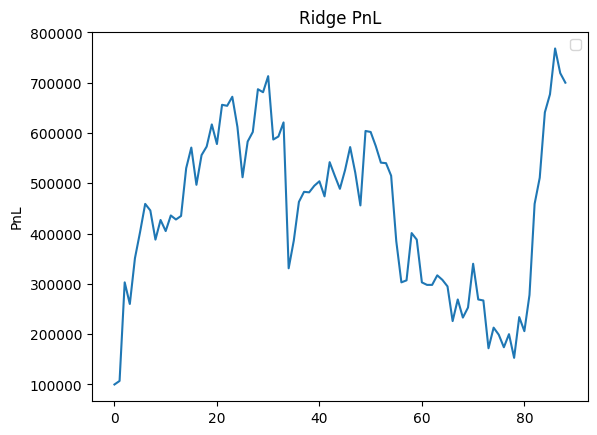

In [81]:
evaluate_result(ridge_clf_feat,'Ridge');

### Solution Model : Bayesian Ridge

In [82]:
bay = linear_model.BayesianRidge()
bay_feat = bay.fit(X_train,y_train)
validate_result(bay_feat,'Bayesian')
solution_models['Bay All Feat'] = bay_feat

RMSE:  0.7019988544415825
R2 score:  0.8864928293845338


/home/cypdupmad/.pyenv/versions/taxifare-env/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


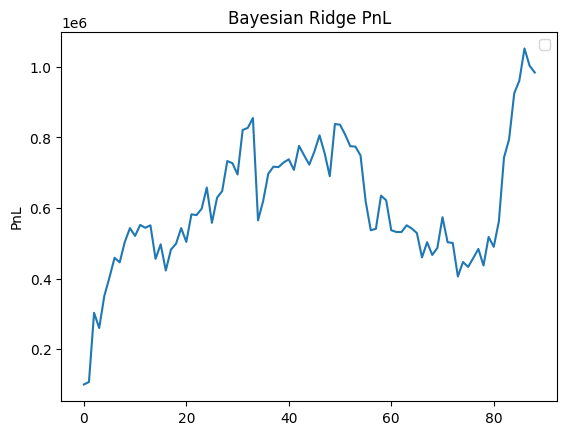

In [83]:
evaluate_result(bay_feat,'Bayesian Ridge');

### Solution Model : Gradient Boosting Regressor

In [84]:
regr =GradientBoostingRegressor(n_estimators=70, learning_rate=0.1,max_depth=4, random_state=0, loss='ls')
GB_feat = regr.fit(X_train,y_train)
validate_result(GB_feat,'NB')
solution_models['GB All Feat'] = GB_feat

/home/cypdupmad/.pyenv/versions/taxifare-env/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/cypdupmad/.pyenv/versions/taxifare-env/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:294: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  warnings.warn(


RMSE:  0.883005301144291
R2 score:  0.8204120830401276


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


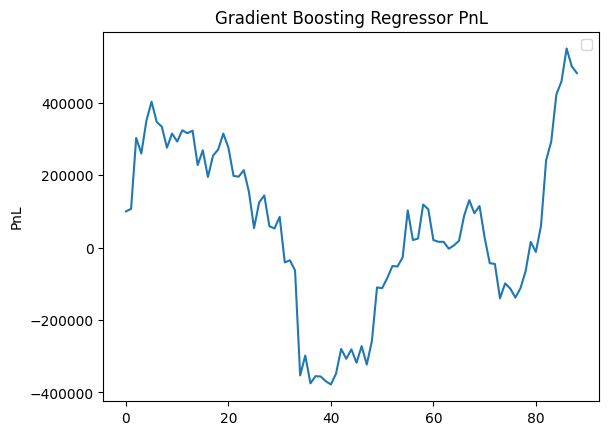

In [85]:
evaluate_result(GB_feat,'Gradient Boosting Regressor');

### Solution Model : Stochastic Gradient Descent (SGD)

In [86]:
from sklearn.linear_model import SGDRegressor
sgd =SGDRegressor(max_iter=1000, tol=1e-3,loss='squared_epsilon_insensitive',penalty='l1',alpha=0.1)
sgd_feat = sgd.fit(X_train,y_train)
validate_result(sgd_feat,'SGD')
solution_models['SGD All Feat'] = sgd_feat

/home/cypdupmad/.pyenv/versions/taxifare-env/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


RMSE:  0.7497563154083173
R2 score:  0.8705235579788375


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


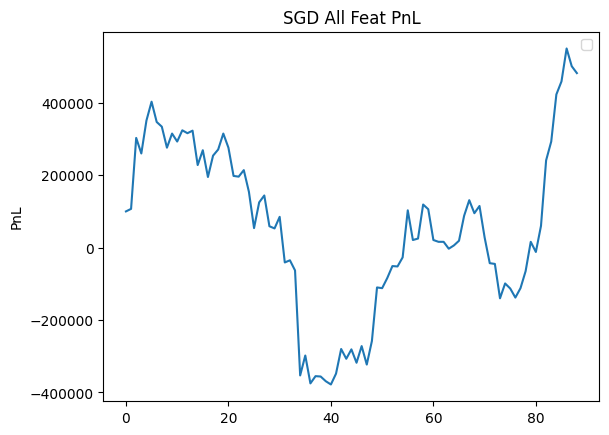

In [87]:
evaluate_result(GB_feat,'SGD All Feat');

## Comparison of RMSE of Benchmark and all Solution Models

In [88]:
RMSE_scores = {}
for name, model in solution_models.items():
    predicted = model.predict(X_val)
    RSME_score = np.sqrt(mean_squared_error(y_val, predicted))
    RMSE_scores[name] = RSME_score

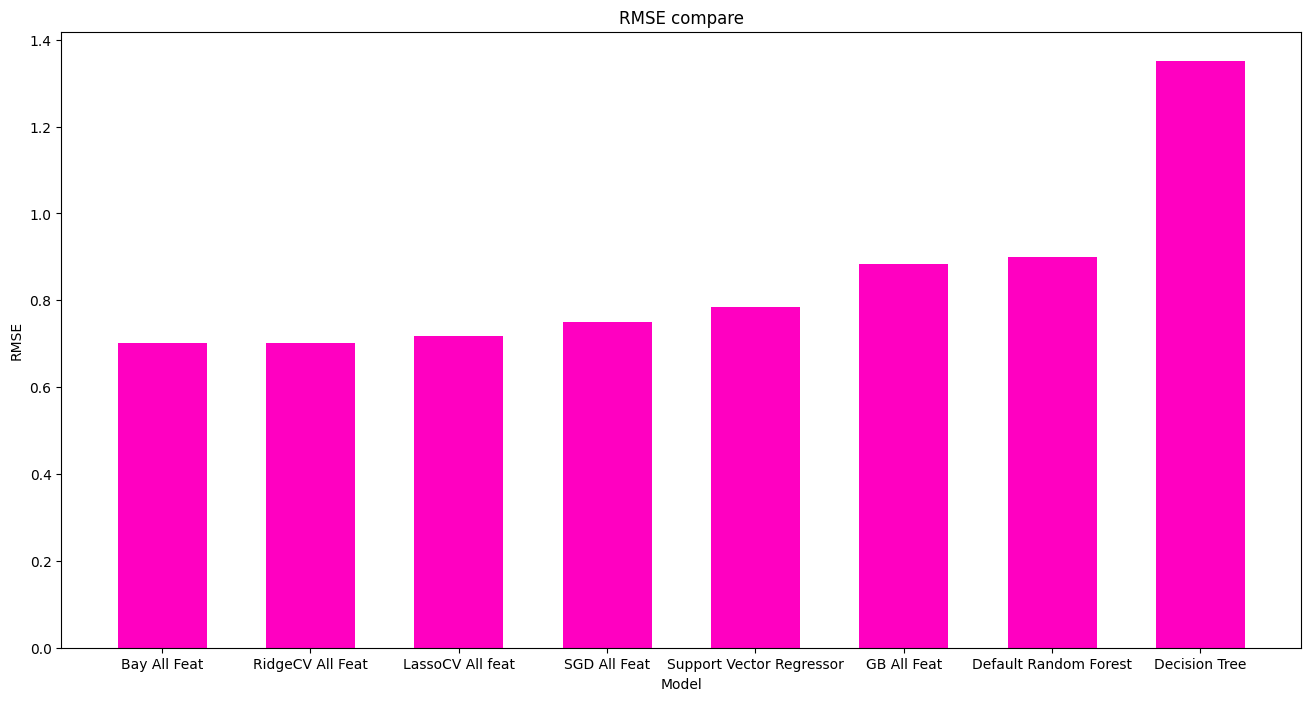

In [89]:
model_names = []
model_values = []
for name, value in RMSE_scores.items():
    model_names.append(name)
    model_values.append(value)

model_values = np.array(model_values)
model_names = np.array(model_names)

indices = np.argsort(model_values)
columns = model_names[indices[:8]]
values = model_values[indices][:8]

fig = plt.figure(figsize = (16,8))
plt.bar(np.arange(8), values ,width = 0.6, align="center", color = '#ff00c1')
plt.xticks(np.arange(8), columns)
plt.xlabel('Model')
plt.ylabel('RMSE')
plt.title('RMSE compare')   
plt.show()

## Feature Selection

In this step we will select supporting features using sklearn SelectFromModel library using the model who has lowest RMSE.

In [90]:
sfm = SelectFromModel(lasso_clf_feat)
sfm.fit(X_train, y_train)
pd.options.display.max_columns = None
display(X_train.head())

/home/cypdupmad/.pyenv/versions/taxifare-env/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:1614: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,open,high,low,volume,sp_open,sp_high,sp_low,sp_close,sp_ajclose,sp_volume,dj_open,dj_high,dj_low,dj_close,dj_ajclose,dj_volume,eg_open,eg_high,eg_low,eg_close,eg_ajclose,eg_volume,eu_price,eu_open,eu_high,eu_low,eu_trend,of_price,of_open,of_high,of_low,of_volume,of_trend,os_price,os_open,os_high,os_low,os_trend,sf_price,sf_open,sf_high,sf_low,sf_volume,sf_trend,usb_price,usb_open,usb_high,usb_low,usb_trend,plt_price,plt_open,plt_high,plt_low,plt_trend,pld_price,pld_open,pld_high,pld_low,pld_trend,rho_price,usdi_price,usdi_open,usdi_high,usdi_low,usdi_volume,usdi_trend,gdx_open,gdx_high,gdx_low,gdx_close,gdx_adj close,gdx_volume,uso_open,uso_high,uso_low,uso_close,uso_adj close,uso_volume
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2011-12-15,0.744604,0.738369,0.708213,0.216899,0.005672,0.005128,0.011410,0.010907,0.005227,0.357232,0.003723,0.002793,0.005980,0.006808,0.006808,0.144065,0.927031,0.937940,0.923507,0.910390,0.899367,0.062991,0.741754,0.731583,0.736430,0.732978,1.0,0.785133,0.783233,0.780231,0.794484,0.005052,1.0,0.798448,0.814096,0.807724,0.809329,0.0,0.636137,0.654244,0.643157,0.624960,0.586185,1.0,0.293993,0.291288,0.278075,0.308901,1.0,0.664293,0.673522,0.665882,0.645945,0.0,0.204113,0.211690,0.192849,0.215172,1.0,0.548077,0.081679,0.093315,0.079047,0.080869,0.159639,0.0,0.899375,0.893381,0.882804,0.871333,0.866741,0.069810,0.860865,0.843595,0.843889,0.827313,0.827313,0.106029
2011-12-16,0.738655,0.744116,0.738341,0.180089,0.000994,0.003671,0.007393,0.007502,0.006067,0.401814,0.006707,0.002815,0.005588,0.006648,0.006648,0.427205,0.914762,0.924504,0.939470,0.936364,0.925062,0.073974,0.746546,0.742309,0.746503,0.744186,1.0,0.767439,0.769278,0.760763,0.769765,0.231123,0.0,0.802866,0.796265,0.793551,0.799687,1.0,0.631592,0.635704,0.636378,0.643179,0.320831,0.0,0.262095,0.259220,0.245989,0.277487,0.0,0.670114,0.667815,0.674665,0.670759,1.0,0.210715,0.222403,0.204337,0.225793,1.0,0.538462,0.077997,0.077795,0.069712,0.073024,0.091692,0.0,0.887996,0.894269,0.893396,0.893556,0.889119,0.050814,0.839550,0.830756,0.834374,0.831424,0.831424,0.105682
2011-12-19,0.754842,0.750821,0.744669,0.119667,0.000000,0.000000,0.000000,0.000000,0.000000,0.325512,0.006461,0.000000,0.000000,0.000000,0.000000,0.142092,0.856645,0.856686,0.817746,0.803896,0.794015,0.195237,0.735269,0.748800,0.734471,0.739703,0.0,0.770388,0.770500,0.760863,0.768846,0.245146,1.0,0.806448,0.800361,0.789182,0.799928,1.0,0.616120,0.627953,0.616786,0.632197,0.330109,0.0,0.240298,0.237306,0.224064,0.256021,0.0,0.660603,0.675938,0.670326,0.674817,0.0,0.190290,0.227014,0.213242,0.206897,0.0,0.538462,0.076317,0.082770,0.072691,0.080668,0.006374,0.0,0.887773,0.880275,0.870633,0.860000,0.855329,0.045691,0.845767,0.829297,0.840321,0.829369,0.829369,0.058437
2011-12-20,0.773381,0.772304,0.775210,0.082714,0.000702,0.010605,0.001979,0.021005,0.016988,0.412112,0.000000,0.012728,0.002235,0.022395,0.022395,0.175731,0.822420,0.834933,0.841692,0.833766,0.823565,0.071822,0.758951,0.737511,0.759373,0.743345,1.0,0.801810,0.777325,0.787958,0.784576,0.285344,1.0,0.823881,0.831928,0.851423,0.846209,1.0,0.632495,0.609196,0.622228,0.633816,0.270460,1.0,0.302499,0.299840,0.286631,0.317277,1.0,0.685187,0.661851,0.679684,0.678510,1.0,0.214841,0.222200,0.202977,0.226000,1.0,0.538462,0.078958,0.106248,0.091360,0.077047,0.160339,1.0,0.885319,0.895824,0.900834,0.900444,0.896056,0.030410,0.872706,0.863146,0.878680,0.869310,0.869310,0.082454
2011-12-21,0.775595,0.773673,0.769019,0.113697,0.010934,0.011887,0.015834,0.022390,0.018108,0.347056,0.022196,0.012899,0.017554,0.022671,0.022671,0.173568,0.830815,0.851568,0.853665,0.853247,0.842836,0.068013,0.749366,0.758961,0.777280,0.751751,0.0,0.811775,0.806356,0.796989,0.807559,0.240130,1.0,0.865194,0.845783,0.846227,0.851272,1.0,0.621941,0.631643,0.641167,0.644671,0.372674,0.0,0.325359,0.322822,0.309626,0.339791,1.0,0.679262,0.688021,0.697668,0.688394,0.0,0.227563,0.226607,0.228876,0.227862,1.0,0.538462,0.082039,0.

In [91]:
sup = sfm.get_support()
zipped = zip(X_train,sup)
print(*zipped)

('open', False) ('high', True) ('low', True) ('volume', False) ('sp_open', False) ('sp_high', False) ('sp_low', False) ('sp_close', False) ('sp_ajclose', False) ('sp_volume', False) ('dj_open', False) ('dj_high', False) ('dj_low', False) ('dj_close', False) ('dj_ajclose', False) ('dj_volume', False) ('eg_open', False) ('eg_high', False) ('eg_low', False) ('eg_close', False) ('eg_ajclose', False) ('eg_volume', False) ('eu_price', False) ('eu_open', False) ('eu_high', False) ('eu_low', False) ('eu_trend', True) ('of_price', False) ('of_open', False) ('of_high', False) ('of_low', False) ('of_volume', False) ('of_trend', False) ('os_price', False) ('os_open', False) ('os_high', False) ('os_low', False) ('os_trend', True) ('sf_price', False) ('sf_open', False) ('sf_high', False) ('sf_low', False) ('sf_volume', False) ('sf_trend', False) ('usb_price', False) ('usb_open', False) ('usb_high', False) ('usb_low', False) ('usb_trend', True) ('plt_price', False) ('plt_open', False) ('plt_high', Fa

In [92]:
# Selecting Features which supports Model building process

X_train_features = X_train[['open','high','low','of_trend','usb_trend','plt_trend','usdi_price','gdx_close']]
X_val_features = X_val[['open','high','low','of_trend','usb_trend','plt_trend','usdi_price','gdx_close']]
display(X_train_features.head())
display(X_val_features.head())

,open,high,low,of_trend,usb_trend,plt_trend,usdi_price,gdx_close
Date,,,,,,,,
2011-12-15,0.744604,0.738369,0.708213,1.0,1.0,0.0,0.081679,0.871333
2011-12-16,0.738655,0.744116,0.738341,0.0,0.0,1.0,0.077997,0.893556
2011-12-19,0.754842,0.750821,0.744669,1.0,0.0,0.0,0.076317,0.860000
2011-12-20,0.773381,0.772304,0.775210,1.0,1.0,1.0,0.078958,0.900444
2011-12-21,0.775595,0.773673,0.769019,1.0,1.0,0.0,0.082039,0.899778


,open,high,low,of_trend,usb_trend,plt_trend,usdi_price,gdx_close
Date,,,,,,,,
2018-08-21,0.163946,0.165709,0.167974,1.0,1.0,0.0,0.674324,0.143333
2018-08-22,0.172524,0.171045,0.176640,1.0,0.0,0.0,0.670362,0.146444
2018-08-23,0.162701,0.162698,0.162746,0.0,1.0,0.0,0.691652,0.133111
2018-08-24,0.170587,0.183771,0.178566,1.0,0.0,1.0,0.670842,0.144000
2018-08-27,0.182623,0.188697,0.191085,1.0,1.0,1.0,0.655675,0.151333


Train Test Split

In [93]:
 for train_index, test_index in ts_split.split(X_train_features):
        X_train2, X_test2 = X_train_features[:len(train_index)], X_train_features[len(train_index): (len(train_index)+len(test_index))]
        y_train2, y_test2 = y_train[:len(train_index)].values.ravel(), y_train[len(train_index): (len(train_index)+len(test_index))].values.ravel()

validation Feature Selected Benchmark & Solution Model

In [94]:
def feature_selected_validate_result(model, model_name):
    predicted = model.predict(X_val_features)
    
    RSME_score = np.sqrt(mean_squared_error(y_val, predicted))
    R2_score = r2_score(y_val, predicted)
    
    print(model_name + '\n')
    print('RMSE: ', RSME_score)
    print('R2 score: ', R2_score)
    print('----------------------')

In [95]:
print('---------Benchmark-------------')  
dt = DecisionTreeRegressor(random_state=0)
benchmark_dt_fs = dt.fit(X_train_features,y_train)
feature_selected_validate_result(benchmark_dt_fs, 'Decision Tree')

feature_selected_solution_models = {}

---------Benchmark-------------
Decision Tree

RMSE:  1.2782093443947227
R2 score:  0.6236824543166521
----------------------


In [96]:
print('--------Solution Models--------------')  
# Random Forest
random_forest_clf_fs = RandomForestRegressor(random_state=0,
                                             max_depth=3,
                                             max_features='auto',
                                             n_estimators=10
)
random_forest_parameters = {
    'n_estimators':[10, 50, 100],
    'max_features':['auto','sqrt','log2'],
    'max_depth':[3, 5, 7],
}
grid_search_RF_fs = GridSearchCV(estimator=random_forest_clf_fs,
                           param_grid=random_forest_parameters,
                           cv=ts_split,
)
grid_search_RF_fs.fit(X_train_features, y_train)
feature_selected_validate_result(grid_search_RF_fs,'Feature selected RandomForest GS')
feature_selected_solution_models['FS_RandomForest'] = grid_search_RF_fs

--------Solution Models--------------


/home/cypdupmad/.pyenv/versions/taxifare-env/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cypdupmad/.pyenv/versions/taxifare-env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/cypdupmad/.pyenv/versions/taxifare-env/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_

/home/cypdupmad/.pyenv/versions/taxifare-env/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cypdupmad/.pyenv/versions/taxifare-env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/cypdupmad/.pyenv/versions/taxifare-env/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_

/home/cypdupmad/.pyenv/versions/taxifare-env/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cypdupmad/.pyenv/versions/taxifare-env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/cypdupmad/.pyenv/versions/taxifare-env/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_

/home/cypdupmad/.pyenv/versions/taxifare-env/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cypdupmad/.pyenv/versions/taxifare-env/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cypdupmad/.pyenv/versions/taxifare-env/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cypdupmad/.pyenv/versions/taxif

/home/cypdupmad/.pyenv/versions/taxifare-env/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cypdupmad/.pyenv/versions/taxifare-env/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cypdupmad/.pyenv/versions/taxifare-env/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cypdupmad/.pyenv/versions/taxif

/home/cypdupmad/.pyenv/versions/taxifare-env/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cypdupmad/.pyenv/versions/taxifare-env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/cypdupmad/.pyenv/versions/taxifare-env/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_

/home/cypdupmad/.pyenv/versions/taxifare-env/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cypdupmad/.pyenv/versions/taxifare-env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/cypdupmad/.pyenv/versions/taxifare-env/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_

/home/cypdupmad/.pyenv/versions/taxifare-env/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cypdupmad/.pyenv/versions/taxifare-env/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cypdupmad/.pyenv/versions/taxifare-env/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cypdupmad/.pyenv/versions/taxif

/home/cypdupmad/.pyenv/versions/taxifare-env/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cypdupmad/.pyenv/versions/taxifare-env/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cypdupmad/.pyenv/versions/taxifare-env/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cypdupmad/.pyenv/versions/taxif

/home/cypdupmad/.pyenv/versions/taxifare-env/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cypdupmad/.pyenv/versions/taxifare-env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/cypdupmad/.pyenv/versions/taxifare-env/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_

/home/cypdupmad/.pyenv/versions/taxifare-env/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cypdupmad/.pyenv/versions/taxifare-env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/cypdupmad/.pyenv/versions/taxifare-env/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_

/home/cypdupmad/.pyenv/versions/taxifare-env/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cypdupmad/.pyenv/versions/taxifare-env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/cypdupmad/.pyenv/versions/taxifare-env/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_

/home/cypdupmad/.pyenv/versions/taxifare-env/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cypdupmad/.pyenv/versions/taxifare-env/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cypdupmad/.pyenv/versions/taxifare-env/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cypdupmad/.pyenv/versions/taxif

/home/cypdupmad/.pyenv/versions/taxifare-env/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cypdupmad/.pyenv/versions/taxifare-env/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cypdupmad/.pyenv/versions/taxifare-env/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cypdupmad/.pyenv/versions/taxif

Feature selected RandomForest GS

RMSE:  0.859195696015739
R2 score:  0.8299664285445302
----------------------


In [97]:
# Linear SVR
linear_svr_fs = SVR(
                          C=50.0,
                          epsilon=0,kernel='linear')
linear_svr_clf_fs = linear_svr_fs.fit(X_train_features,y_train)
feature_selected_validate_result(linear_svr_clf_fs,'Feature selected LSVR')
feature_selected_solution_models['FS_LSVR'] = linear_svr_clf_fs

/home/cypdupmad/.pyenv/versions/taxifare-env/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Feature selected LSVR

RMSE:  0.7233498244242387
R2 score:  0.8794832942194726
----------------------


In [98]:
# lasso
lasso_fs = LassoCV(n_alphas=1000, max_iter=3000, random_state=0)
lasso_clf_fs = lasso_fs.fit(X_train_features,y_train)
feature_selected_validate_result(lasso_clf_fs,'Feature selected LassoCV')
feature_selected_solution_models['FS_Lasso'] = lasso_clf_fs

# Ridge
ridge_fs = RidgeCV(gcv_mode='auto')
ridge_clf_fs = ridge_fs.fit(X_train_features,y_train)
feature_selected_validate_result(ridge_clf_fs,'Feature selected RidgeCV')
feature_selected_solution_models['FS_RidgeCV'] = ridge_clf_fs

/home/cypdupmad/.pyenv/versions/taxifare-env/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:1614: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Feature selected LassoCV

RMSE:  0.7211265981217824
R2 score:  0.8802229754875597
----------------------
Feature selected RidgeCV

RMSE:  0.7321808004911724
R2 score:  0.876522688684754
----------------------


In [99]:
# bayesian ridge
bay = linear_model.BayesianRidge()
bay_feat_fs = bay.fit(X_train_features,y_train)
feature_selected_validate_result(bay_feat_fs,'Feature selected BayRidge')
feature_selected_solution_models['Bay_Ridge'] = bay_feat_fs

#Gradient Boosting
regr =GradientBoostingRegressor(n_estimators=70, learning_rate=0.1,max_depth=4, random_state=0, loss='ls')
GB_fs = regr.fit(X_train_features,y_train)
feature_selected_validate_result(GB_fs,'Feature selected GB')
feature_selected_solution_models['GB_FS'] = GB_fs

/home/cypdupmad/.pyenv/versions/taxifare-env/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/cypdupmad/.pyenv/versions/taxifare-env/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/cypdupmad/.pyenv/versions/taxifare-env/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:294: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  warnings.warn(


Feature selected BayRidge

RMSE:  0.7152611634804782
R2 score:  0.8821635145407184
----------------------
Feature selected GB

RMSE:  0.866489692716155
R2 score:  0.8270672318835129
----------------------


In [100]:
#SGD

sgd =SGDRegressor(max_iter=1000, tol=1e-3,loss='squared_epsilon_insensitive',penalty='l1',alpha=0.1)
sgd_fs = sgd.fit(X_train_features,y_train)
feature_selected_validate_result(sgd_fs,'Feature selected SGD')
feature_selected_solution_models['sgd_fs'] = sgd_fs

Feature selected SGD

RMSE:  0.7223763593869322
R2 score:  0.8798074523329146
----------------------


/home/cypdupmad/.pyenv/versions/taxifare-env/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Model Review

In [101]:
FS_RMSE_scores = {}

def fs_model_review(models):
    benchmark_dt_predicted = benchmark_dt_fs.predict(X_val_features)
    benchmark_RSME_score = np.sqrt(mean_squared_error(y_val, benchmark_dt_predicted))
    FS_RMSE_scores['Benchmark'] = benchmark_RSME_score
    
    for name, model in models.items():
        predicted = model.predict(X_val_features)
        RSME_score = np.sqrt(mean_squared_error(y_val, predicted))
        R2_score = r2_score(y_val, predicted)
        FS_RMSE_scores[name] = RSME_score

In [102]:
fs_model_review(feature_selected_solution_models)

In [103]:
model_values

array([1.3507601 , 0.78545586, 0.8998894 , 0.71807084, 0.70239082,
       0.70199885, 0.8830053 , 0.74975632])

In [104]:
fs_indices

NameError: name 'fs_indices' is not defined

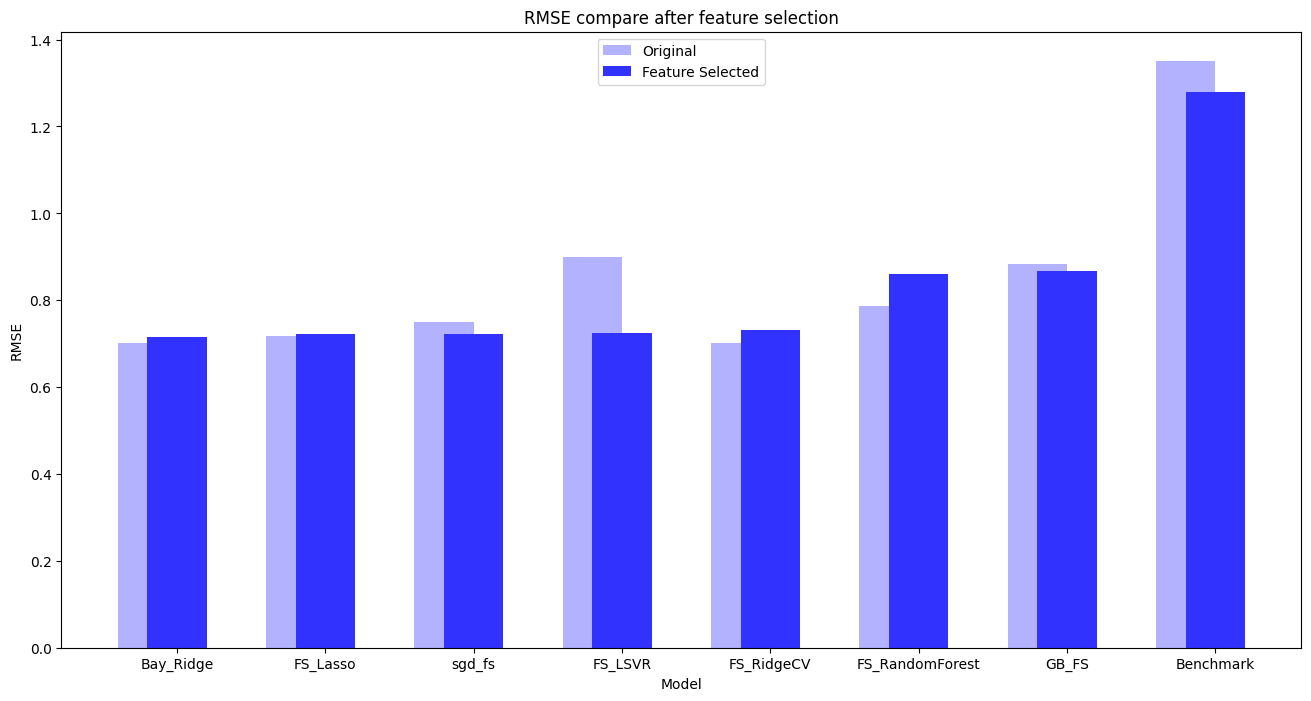

In [105]:
fs_model_names = []
fs_model_values = []
for name, value in FS_RMSE_scores.items():
    fs_model_names.append(name)
    fs_model_values.append(value)

fs_model_values = np.array(fs_model_values)
fs_model_names = np.array(fs_model_names)

fs_indices = np.argsort(fs_model_values)
fs_columns = fs_model_names[fs_indices[:8]]
fs_values = fs_model_values[fs_indices][:8]
origin_values = model_values[fs_indices][:8]

fig = plt.figure(figsize = (16,8))
plt.bar(np.arange(8) - 0.2 , origin_values ,width = 0.4, align="center", color = '#b2b2ff', label = "Original")
plt.bar(np.arange(8), fs_values ,width = 0.4, align="center", color = '#3232ff', label = "Feature Selected")
plt.xticks(np.arange(8), fs_columns)
plt.xlabel('Model')
plt.ylabel('RMSE')
plt.title('RMSE compare after feature selection')
plt.legend(loc = 'upper center')
plt.show()


## Ensemble Solution

So now we will ensemble top three performing models i.e, in case of all the features model Lasso,Bayesian ridge and Ridge are the best performing models so we will ensemble these three models

In [158]:
# Choosing the top three performing models to ensemble them
ensemble_solution_models = [lasso_clf_feat, bay_feat, ridge_clf_feat]

class EnsembleSolution:
    #models = []
    def __init__(self, models):
        self.models = models
    def predictbis(self, X):
        result =  0
        for i in self.models:
            result+=i.predict(X).flatten()   
        result = result / len(self.models)
        return result
    def fit(self, X, y):
        for i in self.models:
            i.fit(X, y)

In [159]:
print("Ensemble Solution Model with Original features")
EnsembleModel = EnsembleSolution(ensemble_solution_models)
#validate_result(EnsembleModel,'EnsembleSolution')

Ensemble Solution Model with Original features


In [160]:
EnsembleModel.predictbis(X_val)

array([112.65274575, 113.26781614, 112.27466327, 113.91673763,
       114.45756461, 113.92727458, 114.02618608, 113.54217258,
       113.45545091, 112.64804195, 113.02625291, 113.81441585,
       113.18063923, 113.25046579, 112.87613444, 113.87336789,
       114.01621274, 113.04165722, 113.80670402, 113.64949752,
       113.99912337, 114.31363685, 113.36481966, 113.68598771,
       113.67375571, 113.18246675, 112.15963913, 112.68540776,
       112.72473131, 113.50706584, 113.72519043, 113.72387313,
       112.69483043, 112.7303603 , 112.94433736, 115.643827  ,
       115.43427024, 116.45709794, 116.07652586, 115.90494692,
       116.0564341 , 116.064962  , 115.56035854, 117.11959868,
       116.51936534, 116.22802531, 117.20110323, 116.30735211,
       116.05038801, 115.07552399, 116.9823678 , 116.75907731,
       116.5559419 , 116.32390639, 116.13009708, 115.82523321,
       114.68757161, 114.02276862, 113.83960773, 114.47271469,
       115.19458897, 115.87507677, 115.89335875, 115.90

In [124]:
len(lasso_clf_feat.predict(X_val))

89

In [130]:
(np.zeros(89)+ bay_feat.predict(X_val) + lasso_clf_feat.predict(X_val) +lasso_clf_feat.predict(X_val))/3

array([112.65550207, 113.280905  , 112.30318774, 113.98766713,
       114.47868478, 113.98838328, 114.02526193, 113.55548822,
       113.52335194, 112.66569575, 113.11509408, 113.85706549,
       113.13855227, 113.27734143, 112.88464029, 113.90500987,
       114.06959104, 113.11250068, 113.85604266, 113.62479809,
       113.94719428, 114.29591947, 113.23339778, 113.67321539,
       113.60383646, 113.16529025, 112.08233352, 112.66134054,
       112.58083376, 113.4852116 , 113.64745798, 113.68243606,
       112.59754739, 112.64210244, 112.81136871, 115.54431805,
       115.33474051, 116.40726017, 116.03427441, 115.86345087,
       116.03319429, 116.05075273, 115.47990304, 117.02727823,
       116.44599586, 116.19518131, 117.16389467, 116.2026623 ,
       115.90808068, 115.00040969, 116.8795167 , 116.68985503,
       116.45946856, 116.20507845, 116.08409656, 115.72460349,
       114.55906117, 113.90390417, 113.73822432, 114.41103155,
       115.05233255, 115.80133013, 115.76513946, 115.75

In [121]:
predicted = EnsembleModel.predictbis(X_val)

In [122]:
predicted

array([[112.65274575, 113.06286866, 112.40385111, ..., 117.63131596,
        117.94968966, 118.14655779],
       [112.85769323, 113.26781614, 112.60879859, ..., 117.83626345,
        118.15463714, 118.35150527],
       [112.52355791, 112.93368082, 112.27466327, ..., 117.50212813,
        117.82050182, 118.01736995],
       ...,
       [115.15959689, 115.5697198 , 114.91070225, ..., 120.1381671 ,
        120.4565408 , 120.65340893],
       [115.33690467, 115.74702758, 115.08801003, ..., 120.31547488,
        120.63384858, 120.83071671],
       [115.41389967, 115.82402258, 115.16500503, ..., 120.39246988,
        120.71084358, 120.90771171]])

In [138]:
print("Ensemble Solution Model with Original features")
EnsembleModel = EnsembleSolution(ensemble_solution_models)
#validate_result(EnsembleModel,'EnsembleSolution')

Ensemble Solution Model with Original features


## Train Model Multiple Times

By the train_reg_multipletimes function.This function would train the model several times (I choosed 7 times ), and use different parameters on TimeSeriesSplit in each time, average the R2 and RMSE. I will apply this function on Benchmark model and on top performing solution models with all features which are Linear SVR, Lasso, Ridge and Bayesian ridge and compare the same.

In [ ]:
X_train

In [113]:
def train_reg_multipletimes(model, times):
    total_rmse = 0
    total_r2 = 0
    for i in range(times):
        reg = model
        for train_index, test_index in TimeSeriesSplit(n_splits=i+2).split(X_train):
            X_train2, X_test2 = X_train[:len(train_index)], X_train[len(train_index): (len(train_index)+len(test_index))]
            y_train2, y_test2 = y_train[:len(train_index)].values.ravel(), y_train[len(train_index): (len(train_index)+len(test_index))].values.ravel()
            reg.fit(X_train2, y_train2)
        predicted = reg.predict(X_val)
        print(train_index)
        rmse, r2 = print_result(y_val, predicted, [0,len(y_val)])
        total_rmse += rmse
        total_r2 += r2
    return total_rmse / times, total_r2 / times

def print_result(actual, predict, index):
    RMSE_score = np.sqrt(mean_squared_error(actual, predict))
    print('From {} to {}'.format(index[0],index[-1]))
    print('RMSE: ', RMSE_score)
    R2_score = r2_score(actual, predict)
    print('R2 score: ', R2_score)
    print('---------------------')
    return RMSE_score, R2_score

In [114]:
print('Benchmark')
t_multiple_benchmark_RMSE,t_multiple_benchmark_R2 = train_reg_multipletimes(default_dt, 7)
print('RMSE: {} //  R2: {}\n'.format(t_multiple_benchmark_RMSE, t_multiple_benchmark_R2))

Benchmark
[   0    1    2 ... 1083 1084 1085]
From 0 to 89
RMSE:  1.6182504762333458
R2 score:  0.3968268812861824
---------------------
[   0    1    2 ... 1218 1219 1220]
From 0 to 89
RMSE:  1.5422357706816239
R2 score:  0.45216214878218486
---------------------
[   0    1    2 ... 1300 1301 1302]
From 0 to 89
RMSE:  1.312777068200947
R2 score:  0.6030530631830977
---------------------
[   0    1    2 ... 1354 1355 1356]
From 0 to 89
RMSE:  1.0160464784151515
R2 score:  0.7622187306076382
---------------------
[   0    1    2 ... 1393 1394 1395]
From 0 to 89
RMSE:  1.1064322913258957
R2 score:  0.7180317715450486
---------------------
[   0    1    2 ... 1422 1423 1424]
From 0 to 89
RMSE:  1.341261265387868
R2 score:  0.5856405416610275
---------------------
[   0    1    2 ... 1445 1446 1447]
From 0 to 89
RMSE:  1.3399470622641245
R2 score:  0.5864521444786248
---------------------
RMSE: 1.3252786303584223 //  R2: 0.5863407545062577



array([[0., 0., 0., 0.]])